# Maryland vehicle crashes

In [1]:
# importing libraries and file.

# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt

# for machine learning
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# dataset download link: https://opendata.maryland.gov/widgets/65du-s3qu

#import the dataset.
#import the dataset here I am taking only first few rows from the dataset.
#df=pd.read_csv('Maryland_Statewide_Vehicle_Crashes.csv',skipfooter = 700000,
#                  engine = 'python')
df=pd.read_csv('Maryland_Statewide_Vehicle_Crashes.csv',engine = 'python')
df

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2022,Q2,Dark Lights On,3.00,Montgomery,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.992210,-77.097021,POINT (-77.097020666667 38.9922095)
2,2020,Q4,NaN,6.02,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.323620,-76.503080,POINT (-76.503080116667 39.323620083333)
3,2022,Q1,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.411213,-76.628028,POINT (-76.628028425147 39.411213105087)
4,2022,Q2,Dark Lights On,3.00,Queen Anne's,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.974880,-76.281090,POINT (-76.28109 38.97488)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848799,2022,Q3,Daylight,1.00,Anne Arundel,2.0,NaN,0.0,Not Applicable,0.0,...,Miles,M,E,607.0,CO,NaN,OLD STAGE RD,39.158164,-76.628893,POINT (-76.62889296443 39.158163996637)
848800,2022,Q3,Daylight,1.00,Baltimore,3.0,NaN,0.0,NaN,88.0,...,Feet,F,N,1300.0,CO,NaN,REGESTER AVE,39.378626,-76.608568,POINT (-76.608567616667 39.378625966667)
848801,2022,Q3,Daylight,1.00,Baltimore,3.0,NaN,0.0,Not Applicable,0.0,...,Feet,F,W,4095.0,CO,NaN,EBENEZER RD,39.387539,-76.418305,POINT (-76.418304879322 39.387539278395)
848802,2022,Q3,Daylight,1.00,Anne Arundel,2.0,NaN,0.0,Non Intersection,1.0,...,Feet,F,N,12.0,SR,NaN,OCEANIC DR,39.019090,-76.403650,POINT (-76.40365 39.01909)


In [3]:
df.shape   #To find the count of rows and columns in the df

(848804, 55)

In [4]:
#column names of the dataset
df.columns

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'MUNI_DESC', 'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE',
       'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE', 'SURF_COND_DESC',
       'SURF_COND_CODE', 'LANE_CODE', 'RD_COND_DESC', 'RD_COND_CODE',
       'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC', 'FIX_OBJ_CODE',
       'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC', 'WEATHER_CODE', 'ACC_DATE',
       'ACC_TIME', 'LOC_CODE', 'SIGNAL_FLAG_DESC', 'SIGNAL_FLAG',
       'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE', 'HARM_EVENT_DESC1',
       'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2', 'HARM_EVENT_CODE2', 'RTE_NO',
       'ROUTE_TYPE_CODE', 'RTE_SUFFIX', 'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC',
       'LOGMILE_DIR_FLAG', 'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC',
       'FEET_MILES_FLAG', 'DISTANCE_DIR_FLAG', 'REFERENCE_NO',
       'REFERENCE_TYPE_CODE', 'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dty

In [5]:
df.describe()

,YEAR,LIGHT_CODE,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,RD_COND_CODE,...,WEATHER_CODE,ACC_DATE,HARM_EVENT_CODE1,HARM_EVENT_CODE2,RTE_NO,LOG_MILE,DISTANCE,REFERENCE_NO,LATITUDE,LONGITUDE
count,848804.000000,848804.000000,848791.000000,0.0,635918.000000,764448.000000,848804.000000,764448.000000,645134.000000,764448.000000,...,848804.000000,8.488040e+05,848804.000000,848804.000000,678672.000000,760951.000000,745912.000000,671461.000000,848804.000000,848804.000000
mean,2018.292162,3.920314,12.758671,NaN,103.102466,2.654248,21.301865,2.650846,1.487601,1.779313,...,6.271491,2.018359e+07,3.946662,2.129694,969.321136,4.817931,63.561981,1282.173195,39.145036,-76.744918
std,2.222439,13.463945,7.863632,NaN,288.485994,9.991348,29.863128,9.131210,0.804584,8.547742,...,10.244158,2.220203e+04,8.571561,7.514640,1632.210201,9.263772,141.342771,1921.826956,0.310852,0.468617
min,2015.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.015010e+07,0.000000,0.000000,-121.000000,0.000000,0.000000,-295.000000,37.000000,-79.996100
25%,2016.000000,1.000000,3.000000,NaN,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000,...,6.010000,2.016111e+07,1.000000,0.000000,90.000000,0.230000,0.000000,59.000000,38.981895,-76.940341
50%,2018.000000,1.000000,15.000000,NaN,0.000000,1.000000,11.000000,2.000000,1.000000,1.000000,...,6.010000,2.018093e+07,1.000000,0.000000,258.000000,1.650000,0.500000,355.000000,39.225461,-76.709834
75%,2020.000000,3.000000,18.000000,NaN,0.000000,2.000000,17.000000,2.000000,2.000000,1.000000,...,6.010000,2.020092e+07,3.000000,1.000000,912.000000,6.460000,50.000000,1666.000000,39.346254,-76.574147
max,2022.000000,99.000000,24.000000,NaN,999.000000,99.000000,99.000000,99.000000,18.000000,99.000000,...,99.000000,2.022093e+07,99.000000,99.000000,9922.000000,5100.000000,1000.000000,9921.000000,39.994802,-75.000000


In [6]:
#checking the null values count for each column
df.isnull().sum()

YEAR                          0
QUARTER                       0
LIGHT_DESC                34855
LIGHT_CODE                    0
COUNTY_DESC                  13
COUNTY_NO                    13
MUNI_DESC                848804
MUNI_CODE                212886
JUNCTION_DESC            114236
JUNCTION_CODE             84356
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC            86726
SURF_COND_CODE            84356
LANE_CODE                203670
RD_COND_DESC              84356
RD_COND_CODE              84356
RD_DIV_DESC               88855
RD_DIV_CODE               84356
FIX_OBJ_DESC              45511
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC             406780
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 459726
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE_FLAG                 0
AGENCY_C

In [7]:
#To find if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848804 entries, 0 to 848803
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   848804 non-null  int64  
 1   QUARTER                848804 non-null  object 
 2   LIGHT_DESC             813949 non-null  object 
 3   LIGHT_CODE             848804 non-null  float64
 4   COUNTY_DESC            848791 non-null  object 
 5   COUNTY_NO              848791 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              635918 non-null  float64
 8   JUNCTION_DESC          734568 non-null  object 
 9   JUNCTION_CODE          764448 non-null  float64
 10  COLLISION_TYPE_DESC    848804 non-null  object 
 11  COLLISION_TYPE_CODE    848804 non-null  int64  
 12  SURF_COND_DESC         762078 non-null  object 
 13  SURF_COND_CODE         764448 non-null  float64
 14  LANE_CODE              645134 non-nu

In [8]:
# dropping the columns which have more null values. these 3 columns have almost more than 90% nulls.
df.drop(['MUNI_DESC','RTE_SUFFIX','REFERENCE_SUFFIX'],axis='columns',inplace=True)

In [9]:
#checking the duplicates in df
dup = df[df.duplicated()]
dup

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,...,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION


In [10]:
#the MUNI_CODE which is numerical representation of MUNI_DESC.Hence dropping it from the df.
df.drop(['MUNI_CODE'],axis='columns',inplace=True)

In [11]:
df.shape

(848804, 51)

In [12]:
#dropping the columns which don't have predictive power 
df.drop(['AREA_CODE','MAINROAD_NAME','REFERENCE_ROAD_NAME','LOCATION',
                           'REPORT_NO','LOC_CODE','REFERENCE_TYPE_CODE','AGENCY_CODE','FEET_MILES_FLAG','SIGNAL_FLAG','LOGMILE_DIR_FLAG','ROUTE_TYPE_CODE'], axis = 'columns',inplace=True)

In [13]:
df.shape

(848804, 39)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848804 entries, 0 to 848803
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   848804 non-null  int64  
 1   QUARTER                848804 non-null  object 
 2   LIGHT_DESC             813949 non-null  object 
 3   LIGHT_CODE             848804 non-null  float64
 4   COUNTY_DESC            848791 non-null  object 
 5   COUNTY_NO              848791 non-null  float64
 6   JUNCTION_DESC          734568 non-null  object 
 7   JUNCTION_CODE          764448 non-null  float64
 8   COLLISION_TYPE_DESC    848804 non-null  object 
 9   COLLISION_TYPE_CODE    848804 non-null  int64  
 10  SURF_COND_DESC         762078 non-null  object 
 11  SURF_COND_CODE         764448 non-null  float64
 12  LANE_CODE              645134 non-null  float64
 13  RD_COND_DESC           764448 non-null  object 
 14  RD_COND_CODE           764448 non-nu

In [15]:
#There are few columns that numerically correspond identically to other columns. So, i am removing those columns.
df.drop(['LIGHT_CODE','COUNTY_NO','JUNCTION_CODE','COLLISION_TYPE_CODE','SURF_COND_CODE','LANE_CODE','RD_COND_CODE','RD_DIV_CODE','FIX_OBJ_CODE','WEATHER_CODE','HARM_EVENT_CODE1','HARM_EVENT_CODE2'], 
                          axis = 'columns',
                         inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848804 entries, 0 to 848803
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   848804 non-null  int64  
 1   QUARTER                848804 non-null  object 
 2   LIGHT_DESC             813949 non-null  object 
 3   COUNTY_DESC            848791 non-null  object 
 4   JUNCTION_DESC          734568 non-null  object 
 5   COLLISION_TYPE_DESC    848804 non-null  object 
 6   SURF_COND_DESC         762078 non-null  object 
 7   RD_COND_DESC           764448 non-null  object 
 8   RD_DIV_DESC            759949 non-null  object 
 9   FIX_OBJ_DESC           803293 non-null  object 
 10  REPORT_TYPE            738071 non-null  object 
 11  WEATHER_DESC           442024 non-null  object 
 12  ACC_DATE               848804 non-null  int64  
 13  ACC_TIME               848804 non-null  object 
 14  SIGNAL_FLAG_DESC       848804 non-nu

In [17]:
# there are few nulls in the some of the columns I will handle this nulls when I create the pipelines for ml models. 

#  TARGET VARIABLE

In [18]:
#  Target variable is REPORT TYPE. Property Damage Crash, Injury Crash, and Fatal Crash are all various classes that are included in the target variable. Injury crash and fatal crash are nearly identical. 

In [19]:
#dropping all the null values in target variable 
df = df.dropna(subset = ['REPORT_TYPE'])

In [20]:
#replacing the class in target varaible 
df['REPORT_TYPE'] = df['REPORT_TYPE'].replace({'Fatal Crash':'Injury Crash'})

In [21]:
df.REPORT_TYPE.value_counts() # value count for target variable

Property Damage Crash    528441
Injury Crash             209630
Name: REPORT_TYPE, dtype: int64

<AxesSubplot:>

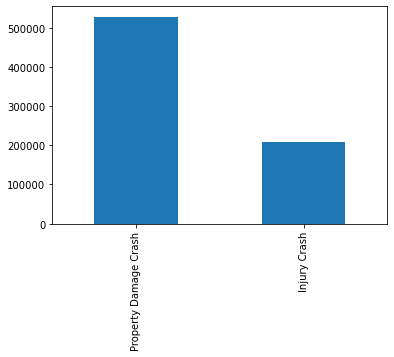

In [22]:
df['REPORT_TYPE'].value_counts().plot.bar() # bar plot for target variable

# Modeling using ML

Splitting data for test-train split

In [23]:
X = df[[x for x in df.columns if x != 'REPORT_TYPE']] # X contains all the variables other than target column.
y = df['REPORT_TYPE'] # Y contains the target conlumn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3000) # splitting the date into 80% training and 20% testing.


print(f'Training examples of maryland vehicle crashes : {X_train.shape[0]}')
print(f'Test examples of maryland vehicle crashes: {X_test.shape[0]}')
print('\nFeature names are:')
print(*X.columns, sep='\t')

Training examples of maryland vehicle crashes : 590456
Test examples of maryland vehicle crashes: 147615

Feature names are:
YEAR	QUARTER	LIGHT_DESC	COUNTY_DESC	JUNCTION_DESC	COLLISION_TYPE_DESC	SURF_COND_DESC	RD_COND_DESC	RD_DIV_DESC	FIX_OBJ_DESC	WEATHER_DESC	ACC_DATE	ACC_TIME	SIGNAL_FLAG_DESC	C_M_ZONE_FLAG	HARM_EVENT_DESC1	HARM_EVENT_DESC2	RTE_NO	LOG_MILE	LOGMILE_DIR_FLAG_DESC	DISTANCE	FEET_MILES_FLAG_DESC	DISTANCE_DIR_FLAG	REFERENCE_NO	LATITUDE	LONGITUDE


In [24]:
numerical = list(df.select_dtypes(['int64']).columns | df.select_dtypes(['float64']).columns)
categorical = list(df.select_dtypes(['object']).columns)

Dividing numerical variables column and categorical variables column using select dtypes function

In [25]:
numerical

['ACC_DATE',
 'DISTANCE',
 'LATITUDE',
 'LOG_MILE',
 'LONGITUDE',
 'REFERENCE_NO',
 'RTE_NO',
 'YEAR']

In [26]:
categorical

['QUARTER',
 'LIGHT_DESC',
 'COUNTY_DESC',
 'JUNCTION_DESC',
 'COLLISION_TYPE_DESC',
 'SURF_COND_DESC',
 'RD_COND_DESC',
 'RD_DIV_DESC',
 'FIX_OBJ_DESC',
 'REPORT_TYPE',
 'WEATHER_DESC',
 'ACC_TIME',
 'SIGNAL_FLAG_DESC',
 'C_M_ZONE_FLAG',
 'HARM_EVENT_DESC1',
 'HARM_EVENT_DESC2',
 'LOGMILE_DIR_FLAG_DESC',
 'FEET_MILES_FLAG_DESC',
 'DISTANCE_DIR_FLAG']

In [27]:
# Removing unneccesory columns
numerical.remove('LATITUDE')
numerical.remove('LONGITUDE')
numerical.remove('REFERENCE_NO')

In [28]:
# Removing the target column
categorical.remove('REPORT_TYPE')

Reference : https://github.com/appliedecon/data602-lectures/blob/main/sklearn-pipeline-example/credit.ipynb

In [29]:
cat_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='most_frequent')),('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))])
y = cat_pipeline.fit_transform(np.array(X_train[categorical]))
y.shape

(590456, 1669)

In [30]:
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])
x = num_pipeline.fit_transform(np.array(X_train[numerical]))
x.shape

(590456, 5)

In [31]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numericlist', num_pipeline, numerical),
                                                      ('create_dummies', cat_pipeline, categorical)])
z = processing_pipeline.fit_transform(X_train)
z

<590456x1674 sparse matrix of type '<class 'numpy.float64'>'
	with 13580488 stored elements in Compressed Sparse Row format>

In [32]:
processing_pipeline

ColumnTransformer(transformers=[('proc_numericlist',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['ACC_DATE', 'DISTANCE', 'LOG_MILE', 'RTE_NO',
                                  'YEAR']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['QUARTER', 'LIGHT_DESC', 'COUNTY_DESC',
                                  'JUNCTION_DESC', 'COLLISION_TYPE_DESC',
     

numerical columns is processed with simple imputer and standard scaler and categorical variables are processed with Simple imputer and OneHotEncoder.

# Modeling with Logistic regression

Reference: https://github.com/appliedecon/data602-lectures/blob/main/logistic-regression/logistic-regression.ipynb

In [33]:
p = Pipeline([('process', processing_pipeline), 
              ('model', LogisticRegression(max_iter=1000))
             ])

params = [{'model__C': [0.01, 0.1, 1, 10],'model__penalty':['l2']},{'model__penalty':['none']}]

logistic = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
logistic = logistic.fit(X_train, y_train)

logistic.best_estimator_

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('proc_numericlist',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cr

In [34]:
y_hat_lr = logistic.best_estimator_.predict(X_test)

In [35]:
print(f'Validation score: {logistic.best_score_:.2%}')
print(f'Test score: {logistic.score(X_test, y_test):.2%}')

Validation score: 73.29%
Test score: 73.22%


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat_lr))

                       precision    recall  f1-score   support

         Injury Crash       0.63      0.15      0.25     42111
Property Damage Crash       0.74      0.96      0.84    105504

             accuracy                           0.73    147615
            macro avg       0.68      0.56      0.54    147615
         weighted avg       0.71      0.73      0.67    147615



# ROC-AUC Curve for LogisticRegression

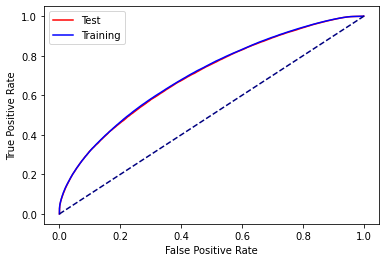

In [37]:
from sklearn.metrics import roc_curve

def generate_probs_lr(X, model = logistic ):
    return model.predict_proba(X)[:, 1]

def generate_roc_lr(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
y_test_roc = y_test.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)
y_train_roc = y_train.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)   
fpr_test, tpr_test = generate_roc_lr(y_test_roc, generate_probs_lr(X_test))
fpr_train, tpr_train = generate_roc_lr(y_train_roc, generate_probs_lr(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs_lr(X_test))

0.6994337920677769

Accuracy of 73% can be considered a good discrimination. I choose roc_auc_score as a metric to decide the model. For this classifier, ROC_AUC score is 70%.

# Modeling with Random Forest

Reference:https://github.com/appliedecon/data602-lectures/blob/main/trees/trees.ipynb

In [39]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



rf_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('rf', RandomForestClassifier())]
)

param_grid = [{'rf__max_depth': [5, 8, 10],
               'rf__n_estimators': [10, 50],
               'rf__class_weight': [ 'balanced', 'balanced_subsample'],
               'rf__max_samples': [878]
              }]

rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='recall', refit=True)
rf_results = rf_results.fit(X_train, y_train)
rf_yhat = rf_results.predict(X_test)

rf_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numericlist',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                              

In [40]:
y_testp = rf_results.predict(X_test)
y_testp_rf = rf_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

                       precision    recall  f1-score   support

         Injury Crash       0.37      0.56      0.44     42111
Property Damage Crash       0.78      0.61      0.68    105504

             accuracy                           0.60    147615
            macro avg       0.57      0.59      0.56    147615
         weighted avg       0.66      0.60      0.61    147615



# ROC-AUC Curve for Random Forest

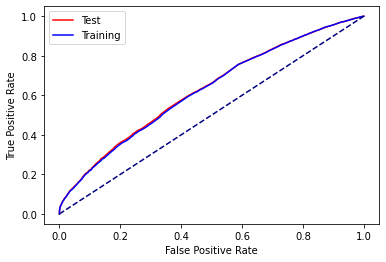

In [41]:
from sklearn.metrics import roc_curve

def generate_probs_rf(X, model = rf_results):
    return model.predict_proba(X)[:, 1]

def generate_roc_rf(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
y_test_roc = y_test.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)
y_train_roc = y_train.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)   
fpr_test, tpr_test = generate_roc_rf(y_test_roc, generate_probs_rf(X_test))
fpr_train, tpr_train = generate_roc_rf(y_train_roc, generate_probs_rf(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs_rf(X_test))

0.627563265315923

Accuracy of 60% can be considered a good discrimination. I choose roc_auc_score as a metric to decide the model. For this classifier, ROC_AUC score is 62% which is not better than Logistic.

# Classification using Decision Tree

Reference:https://github.com/appliedecon/data602-lectures/blob/main/trees/trees.ipynb

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier())]
)

param_grid = [
  {'dt__max_depth': [3, 5, 6, 8,10],
   'dt__min_samples_split':[2,4,6,8],
   'dt__min_samples_leaf': [3, 7],
   'dt__class_weight':[None, 'balanced']
  }
 ]

dt_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, scoring='accuracy', refit=True)

dt_results = dt_results.fit(X_train, y_train)

dt_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numericlist',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['ACC_DATE', 'DISTANCE',
                                                   'LOG_MILE', 'RTE_NO',
                                                   'YEAR']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                              

In [44]:
y_testp = dt_results.predict(X_test)
y_testp_dt = dt_results.predict_proba(X_test)

print(classification_report(y_test, y_testp))

                       precision    recall  f1-score   support

         Injury Crash       0.66      0.12      0.20     42111
Property Damage Crash       0.73      0.98      0.84    105504

             accuracy                           0.73    147615
            macro avg       0.70      0.55      0.52    147615
         weighted avg       0.71      0.73      0.66    147615



# ROC-AUC Curve for Decision Tree

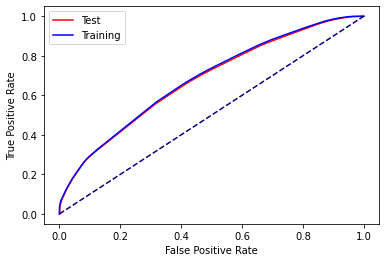

In [45]:
def generate_probs_dt(X, model = dt_results):
    return model.predict_proba(X)[:, 1]

def generate_roc_dt(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
y_test_roc = y_test.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)
y_train_roc = y_train.map({'Property Damage Crash': 1, 'Injury Crash': 0}).astype(int)   
fpr_test, tpr_test = generate_roc_dt(y_test_roc, generate_probs_dt(X_test))
fpr_train, tpr_train = generate_roc_dt(y_train_roc, generate_probs_dt(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs_dt(X_test))

0.6765126329987171

Accuracy of 73% can be considered a good discrimination. I choose roc_auc_score as a metric to decide the model. For this classifier, ROC_AUC score is 67% which is not better than Logistic.

## Conclusion
After analyzing the three models, I think Logistic Regression Classifier has ROC_AUC score is 70% can classify better compared to others. We can improve the accuracy by dealing the dataset imbalance through better modeling techniques.